## Comparison between xmask and pymask machines

### Imports modules

In [1]:
import numpy as np
import xtrack as xt
import xpart as xp
import pandas as pd
import json
import matplotlib.pyplot as plt

# Plotting function
from plotting_functions import plot_all

# Plotly renderer
import plotly.io as pio

# ! Renderer should be set to 'notebook' or 'vscode' (depending on the IDE used) for interactive plots
pio.renderers.default = "browser"

### Build pymask line

In [2]:
path = "pymask/xsuite_lines/line_bb_for_tracking.json"
with open(path) as fid:
    dd = json.load(fid)
p_co = xp.Particles.from_dict(dd["particle_on_tracker_co"])
pm_line = xt.Line.from_dict(dd)
pm_line.particle_ref = xp.Particles.from_dict(dd["particle_on_tracker_co"])
pm_line.build_tracker()

Done loading line from dict.           
Compiling ContextCpu kernels...


7f1a53559d464616bcea3b44398703c6.c:4280: warning: "_GNU_SOURCE" redefined
 4280 | #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
      | 
In file included from 7f1a53559d464616bcea3b44398703c6.c:50:
/afs/cern.ch/work/c/cdroin/private/xmask_DA_study/miniconda/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 1621 | #define _GNU_SOURCE 1
      | 


Done compiling ContextCpu kernels.


In [3]:
for i, x in enumerate(pm_line.element_names):
    if 'bb_ho' in x or 'bb_lr' in x:
        print(x)

bb_lr.l5b1_23
bb_lr.l5b1_22
bb_lr.l5b1_21
bb_lr.l5b1_20
bb_lr.l5b1_19
bb_lr.l5b1_18
bb_lr.l5b1_17
bb_lr.l5b1_16
bb_lr.l5b1_15
bb_lr.l5b1_14
bb_lr.l5b1_13
bb_lr.l5b1_12
bb_lr.l8b1_20
bb_lr.l8b1_19
bb_lr.l8b1_14
bb_lr.l8b1_13
bb_lr.l8b1_12
bb_lr.l8b1_11
bb_lr.l8b1_10
bb_lr.l8b1_09
bb_lr.l8b1_08
bb_lr.l8b1_07
bb_lr.l8b1_02
bb_lr.l8b1_01
bb_ho.l8b1_05
bb_ho.l8b1_04
bb_ho.l8b1_03
bb_ho.l8b1_02
bb_ho.l8b1_01
bb_ho.c8b1_00
bb_ho.r8b1_01
bb_ho.r8b1_02
bb_ho.r8b1_03
bb_ho.r8b1_04
bb_ho.r8b1_05
bb_lr.r8b1_01
bb_lr.r8b1_02
bb_lr.r8b1_03
bb_lr.r8b1_04
bb_lr.r8b1_05
bb_lr.l1b1_23
bb_lr.l1b1_22
bb_lr.l1b1_21
bb_lr.l1b1_20
bb_lr.l1b1_19
bb_lr.l1b1_18
bb_lr.l1b1_17
bb_lr.l1b1_16
bb_lr.l1b1_15
bb_lr.l1b1_14
bb_lr.l1b1_13
bb_lr.l1b1_12
bb_lr.l2b1_20
bb_lr.l2b1_19
bb_lr.l2b1_18
bb_lr.l2b1_17
bb_lr.l2b1_16
bb_lr.l2b1_11
bb_lr.l2b1_10
bb_lr.l2b1_09
bb_lr.l2b1_08
bb_lr.l2b1_07
bb_lr.l2b1_06
bb_lr.l2b1_05
bb_lr.l2b1_04


### Build xmask line

In [4]:
collider = xt.Multiline.from_json("xmask/xsuite_lines/collider_03_tuned_bb_on.json")
collider.build_trackers()

b1 = True
if b1:
    xm_line = collider["lhcb1"]
else:
    xm_line = collider["lhcb2"]

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


ee552bf0bd4c4f43a8abbd5842590e91.c:4280: warning: "_GNU_SOURCE" redefined
 4280 | #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
      | 
In file included from ee552bf0bd4c4f43a8abbd5842590e91.c:50:
/afs/cern.ch/work/c/cdroin/private/xmask_DA_study/miniconda/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 1621 | #define _GNU_SOURCE 1
      | 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


6d7335d30aec4d3b83a7d12d446b2a63.c:4280: warning: "_GNU_SOURCE" redefined
 4280 | #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
      | 
In file included from 6d7335d30aec4d3b83a7d12d446b2a63.c:50:
/afs/cern.ch/work/c/cdroin/private/xmask_DA_study/miniconda/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 1621 | #define _GNU_SOURCE 1
      | 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


### Compare elements in both lines

#### Check element names which differ


In [5]:
# Get element names in pymask and xmask
set_pm = set(pm_line.element_names)
set_xm = set(xm_line.element_names)

# Get elements in pymask but not in xmask
set_pm_not_xm = set_pm - set_xm
print("Elements in pymask but not in xmask", set_pm_not_xm)
print(
    "Elements in xmask but not in pymask that are not drifts",
    [x for x in set_pm_not_xm if "drift" not in x],
)

# Get elements in xmask but not in pymask
set_xm_not_pm = set_xm - set_pm
print("Elements in pymask but not in xmask", set_xm_not_pm)
print("Elements in pymask but not in xmask", [x for x in set_xm_not_pm if "drift" not in x])

Elements in pymask but not in xmask {'drift_11814', 'drift_11788', 'drift_7238', 'drift_8805', 'drift_11796', 'drift_8849', 'drift_7156', 'drift_10249', 'drift_2813', 'drift_2758', 'drift_7129', 'drift_11832', 'drift_7158', 'drift_11792', 'drift_10221', 'drift_7178', 'drift_2829', 'drift_8721', 'drift_10305', 'drift_2858', 'drift_10258', 'drift_8726', 'drift_11789', 'drift_8740', 'drift_8635', 'drift_11798', 'drift_11802', 'drift_7099', 'drift_11785', 'drift_10371', 'drift_10394', 'drift_11818', 'drift_10330', 'drift_11800', 'drift_8771', 'drift_2804', 'drift_8599', 'drift_2919', 'drift_8658', 'drift_8765', 'drift_7205', 'drift_2797', 'drift_2988', 'drift_2861', 'drift_10225', 'drift_8755', 'drift_8826', 'drift_11812', 'drift_10382', 'drift_7077', 'drift_2862', 'drift_11823', 'drift_11786', 'drift_7071', 'drift_7196', 'drift_8724', 'drift_2738', 'drift_2904', 'drift_11795', 'drift_2720', 'drift_8680', 'drift_7219', 'drift_11776', 'drift_7169', 'drift_2787', 'drift_11829', 'drift_10309'

#### Check if some dipoles differ


In [6]:
dipole_names = [x for x in pm_line.element_names if "mb" in x]
for i, dipole in enumerate(dipole_names):
    class_element = pm_line[dipole].to_dict()["__class__"]
    if class_element != "Marker" and class_element != "Drift":
        try:
            if class_element == "SRotation":
                assert pm_line[dipole].cos_z == xm_line[dipole].cos_z
                assert pm_line[dipole].sin_z == xm_line[dipole].sin_z
                assert pm_line[dipole].angle == xm_line[dipole].angle
            else:
                assert pm_line[dipole].length == xm_line[dipole].length
                assert pm_line[dipole].hxl == xm_line[dipole].hxl
                assert pm_line[dipole].hyl == xm_line[dipole].hyl
                assert pm_line[dipole].knl[0] == xm_line[dipole].knl[0]
                assert pm_line[dipole].ksl[0] == xm_line[dipole].ksl[0]
        except:
            try:
                print("PM", dipole, pm_line[dipole].to_dict())
            except Exception as e:
                print(e)
            try:
                print("XM", dipole, xm_line[dipole].to_dict())
            except Exception as e:
                print(e)

#### Check if some multipoles differ 

In [7]:
def check_difference_multipoles(multipole_names, index_strength):
    for i, multipole in enumerate(multipole_names):
        class_element = pm_line[multipole].to_dict()["__class__"]
        if class_element != "Marker" and class_element != "Drift":
            try:
                assert pm_line[multipole].length == xm_line[multipole].length
                assert pm_line[multipole].hxl == xm_line[multipole].hxl
                assert pm_line[multipole].hyl == xm_line[multipole].hyl
                assert np.allclose(
                    pm_line[multipole].knl[index_strength], xm_line[multipole].knl[index_strength]
                )
                assert np.allclose(
                    pm_line[multipole].ksl[index_strength], xm_line[multipole].ksl[index_strength]
                )
            except:
                try:
                    print("PM", multipole, pm_line[multipole].to_dict())
                except Exception as e:
                    print(e)
                try:
                    print("XM", multipole, xm_line[multipole].to_dict())
                except Exception as e:
                    print(e)

In [8]:
# Quadrupoles
quadrupole_names = [x for x in pm_line.element_names if "mq" in x]
check_difference_multipoles(quadrupole_names, 1)

PM mqt.14r3.b1..1 {'__class__': 'Multipole', 'order': 1, 'inv_factorial_order': 1.0, 'length': 0.16, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([ 0.0000000e+00, -1.3400381e-05]), 'ksl': array([0., 0.])}
XM mqt.14r3.b1..1 {'__class__': 'Multipole', 'order': 1, 'inv_factorial_order': 1.0, 'length': 0.16, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([ 0.00000000e+00, -1.33676663e-05]), 'ksl': array([0., 0.])}
PM mqt.14r3.b1..2 {'__class__': 'Multipole', 'order': 1, 'inv_factorial_order': 1.0, 'length': 0.16, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([ 0.0000000e+00, -1.3400381e-05]), 'ksl': array([0., 0.])}
XM mqt.14r3.b1..2 {'__class__': 'Multipole', 'order': 1, 'inv_factorial_order': 1.0, 'length': 0.16, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([ 0.00000000e+00, -1.33676663e-05]), 'ksl': array([0., 0.])}
PM mqt.15r3.b1..1 {'__class__': 'Multipole', 'order': 1, 'inv_factorial_order': 1.0, 'length': 0.16, 'hxl': 0.0, 'hyl': 0.0,

In [9]:
# Sextupoles
sextupole_names = [x for x in pm_line.element_names if "ms" in x]
check_difference_multipoles(sextupole_names, 2)

PM ms.11r3.b1 {'__class__': 'Multipole', 'order': 2, 'inv_factorial_order': 0.5, 'length': 0.369, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([0.        , 0.        , 0.02859794]), 'ksl': array([0., 0., 0.])}
XM ms.11r3.b1 {'__class__': 'Multipole', 'order': 2, 'inv_factorial_order': 0.5, 'length': 0.369, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([0.        , 0.        , 0.02854926]), 'ksl': array([0., 0., 0.])}
PM ms.12r3.b1 {'__class__': 'Multipole', 'order': 2, 'inv_factorial_order': 0.5, 'length': 0.369, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([ 0.        ,  0.        , -0.05953503]), 'ksl': array([0., 0., 0.])}
XM ms.12r3.b1 {'__class__': 'Multipole', 'order': 2, 'inv_factorial_order': 0.5, 'length': 0.369, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([ 0.        ,  0.        , -0.05961634]), 'ksl': array([0., 0., 0.])}
PM ms.13r3.b1 {'__class__': 'Multipole', 'order': 2, 'inv_factorial_order': 0.5, 'length': 0.369, 'hxl

In [10]:
# Octupoles
octupole_names = [x for x in pm_line.element_names if "mo" in x]
check_difference_multipoles(octupole_names, 3)

### Check that main observables are the same

In [11]:
#tw_xm_1 = collider["lhcb1"].twiss()
tw_xm_1 = collider["lhcb1"].twiss()
tw_pm_1 = pm_line.twiss()

In [12]:
print("Tune pymask x:", tw_pm_1.qx)
print("Tune xmask x:", tw_xm_1.qx)
print()
print("Tune pymask y:", tw_pm_1.qy)
print("Tune xmask y:", tw_xm_1.qy)
print()
print("Chromaticity pymask x:", tw_pm_1.dqx)
print("Chromaticity xmask x:", tw_xm_1.dqx)
print()
print("Chromaticity pymask y:", tw_pm_1.dqy)
print("Chromaticity xmask y:", tw_xm_1.dqy)
print()
print("Linear coupling pymask:", tw_pm_1.c_minus)
print("Linear coupling xmask:", tw_xm_1.c_minus)


Tune pymask x: 62.31351438620922
Tune xmask x: 62.29779991483915

Tune pymask y: 60.319173310034586
Tune xmask y: 60.30377860745939

Chromaticity pymask x: 21.022193919763843
Chromaticity xmask x: 21.72760961486497

Chromaticity pymask y: 14.743845947384203
Chromaticity xmask y: 11.461831268221033

Linear coupling pymask: 0.0034949700655757844
Linear coupling xmask: 0.002707345693212342


In [13]:
for ip in [1,2,5,8]:
    print("Pymask", tw_pm_1.rows[f'ip{ip}'].cols['s', 'x', 'px', 'y', 'py'].to_pandas())
    print("Xmask", tw_xm_1.rows[f'ip{ip}'].cols['s', 'x', 'px', 'y', 'py'].to_pandas())
    print()

Pymask   name           s             x       px             y            py
0  ip1  19994.1624 -9.039745e-08  0.00025 -1.111099e-08  2.702683e-07
Xmask   name           s             x       px             y            py
0  ip1  19994.1624 -9.057173e-08  0.00025 -1.162994e-08  2.684610e-07

Pymask   name             s         x            px             y      py
0  ip2  23326.598984 -0.000145  2.224901e-07 -8.901624e-08 -0.0001
Xmask   name             s         x            px             y      py
0  ip2  23326.598984 -0.000145  2.239101e-07 -8.545627e-08 -0.0001

Pymask   name            s             x            px             y       py
0  ip5  6664.568433  7.118580e-08  1.364562e-07 -2.399119e-08  0.00025
Xmask   name            s             x            px             y       py
0  ip5  6664.568433  6.977915e-08  1.335215e-07 -2.479279e-08  0.00025

Pymask   name             s         x        px         y        py
0  ip8  16650.658184 -0.000018  0.000135  0.000014  0.0001

### Replace the pymaks bb values with the xmask ones

In [14]:
# for x in collider.lhcb1.element_dict:#collider.lhcb1.element_dict:
#     dic_el = collider.lhcb1.element_dict[x].to_dict()
#     if "bb" in x and dic_el['__class__']!='Drift':
#         for key in dic_el:
#             if key!='__class__':
#                 setattr(pm_line.element_refs[x], key, dic_el[key])

# tw_pm_1 = pm_line.twiss()


In [15]:
tw_xm_1 = collider["lhcb1"].twiss()
tw_pm_1 = pm_line.twiss()

print("Tune pymask x:", tw_pm_1.qx)
print("Tune xmask x:", tw_xm_1.qx)
print()
print("Tune pymask y:", tw_pm_1.qy)
print("Tune xmask y:", tw_xm_1.qy)
print()
print("Chromaticity pymask x:", tw_pm_1.dqx)
print("Chromaticity xmask x:", tw_xm_1.dqx)
print()
print("Chromaticity pymask y:", tw_pm_1.dqy)
print("Chromaticity xmask y:", tw_xm_1.dqy)
print()
print("Linear coupling pymask:", tw_pm_1.c_minus)
print("Linear coupling xmask:", tw_xm_1.c_minus)

Tune pymask x: 62.31351438620922
Tune xmask x: 62.29779991483915

Tune pymask y: 60.319173310034586
Tune xmask y: 60.30377860745939

Chromaticity pymask x: 21.022193919763843
Chromaticity xmask x: 21.72760961486497

Chromaticity pymask y: 14.743845947384203
Chromaticity xmask y: 11.461831268221033

Linear coupling pymask: 0.0034949700655757844
Linear coupling xmask: 0.002707345693212342


In [16]:
# Deactivate bb and see how values change
collider.vars['beambeam_scale'] = 0

# Set knob for 'on_bb_charge' for pymask
for i, x in enumerate(tw_pm_1.to_pandas().name):
    if "bb_lr" in x or "bb_ho" in x:
        pm_line.element_refs[x].scale_strength = pm_line.vars["on_bb_charge"]

pm_line.vars["on_bb_charge"] = 0

tw_xm_1 = collider["lhcb1"].twiss()
tw_pm_1 = pm_line.twiss()

print("Tune pymask x:", tw_pm_1.qx)
print("Tune xmask x:", tw_xm_1.qx)
print()
print("Tune pymask y:", tw_pm_1.qy)
print("Tune xmask y:", tw_xm_1.qy)
print()
print("Chromaticity pymask x:", tw_pm_1.dqx)
print("Chromaticity xmask x:", tw_xm_1.dqx)
print()
print("Chromaticity pymask y:", tw_pm_1.dqy)
print("Chromaticity xmask y:", tw_xm_1.dqy)
print()
print("Linear coupling pymask:", tw_pm_1.c_minus)
print("Linear coupling xmask:", tw_xm_1.c_minus)

# Reactive bb
collider.vars['beambeam_scale'] = 1
pm_line.vars["on_bb_charge"] = 1



Tune pymask x: 62.31606441243733
Tune xmask x: 62.31600064578007

Tune pymask y: 60.32105649173647
Tune xmask y: 60.321000705021916

Chromaticity pymask x: 14.994044692440976
Chromaticity xmask x: 14.99604078386979

Chromaticity pymask y: 15.00178512987088
Chromaticity xmask y: 14.998334949145042

Linear coupling pymask: 0.0009809784196870368
Linear coupling xmask: 3.451011241232749e-05


In [17]:
# Update linear coupling as well
print([x for x in list(collider.vars._get_value().items()) if "c_minus" in x[0]])

c_minus_re_b1_before_correction = collider.vars['c_minus_re_b1']._value
c_minus_re_b2_before_correction = collider.vars['c_minus_re_b2']._value
cmrskew = pm_line.vars['cmrskew']._value

collider.vars['c_minus_re_b1'] += 0.001
collider.vars['c_minus_re_b2'] += 0.001

print(collider.vars['c_minus_re_b1']._get_value())

tw_xm_1 = collider["lhcb1"].twiss()
tw_xm_2 = collider["lhcb2"].twiss()

print(tw_xm_1.c_minus, tw_xm_2.c_minus)

[('c_minus_re_b1', 0.0), ('c_minus_im_b1', 0.0), ('c_minus_re_b2', 0.0), ('c_minus_im_b2', 0.0)]
0.001
0.003318407202676028 0.004236506111988942


### Plot everything in an interactive widget

In [18]:
fig = plot_all(tw_pm_1, tw_xm_1, tw_xm_2)

fig.write_html("widgets/widget.html", config = {'displayModeBar': False})
fig.show(config = {'displayModeBar': False})

/home/cdroin/comparison_pymask_xmask/plotting_functions.py:281: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/home/cdroin/comparison_pymask_xmask/plotting_functions.py:290: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



### Plot footprint again

0.002761782884494589
0.002707345693212342
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


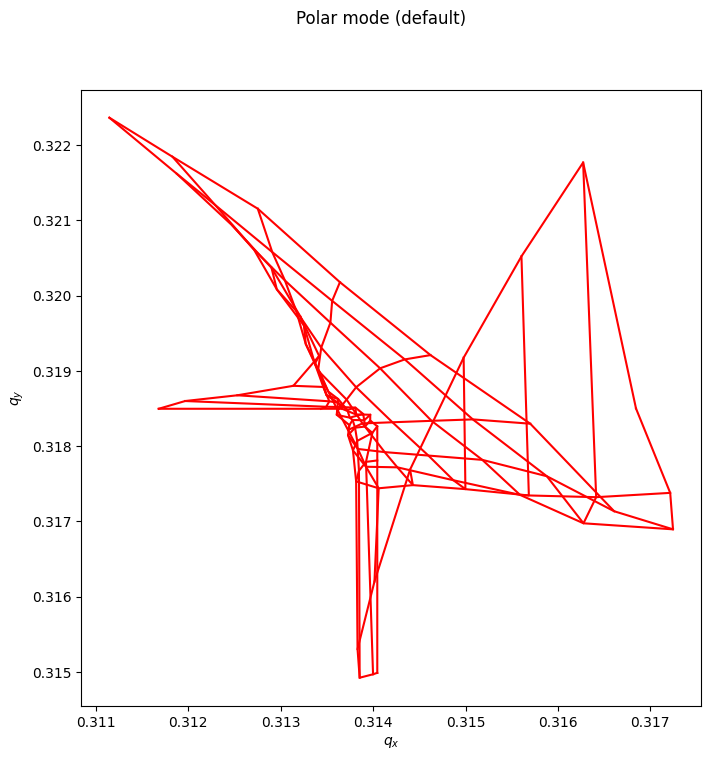

In [22]:
# Temporary remove coupling to get a better footprint
collider.vars['c_minus_re_b1'] = 0
collider.vars['c_minus_re_b2'] = 0
pm_line.vars['cmrskew'] = 0

### CHECK
tw_pm_1 = pm_line.twiss()
tw_xm_1 = collider["lhcb1"].twiss()

print(tw_pm_1.c_minus)
print(tw_xm_1.c_minus)

# Plot footprint
fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.5e-6,
    nemitt_y=2.5e-6,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1/2)],
)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#fp_polar_xm.plot(ax=ax, label="no rescale bb")
#plt.suptitle("Polar mode (default) - no rescale on beambeam. Xmask.")
#plt.show()


fp_polar = pm_line.get_footprint(
    nemitt_x=2.5e-6,
    nemitt_y=2.5e-6,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="on_bb_charge", v0=0.0, dv=0.1/2)],
)

#fig, ax = plt.subplots(1, 1, figsize=(8, 8))
fp_polar.plot(ax=ax, label="no rescale bb", color = 'red')
plt.suptitle("Polar mode (default)")
plt.show()

# Set back coupling
collider.vars['c_minus_re_b1'] = c_minus_re_b1_before_correction + 0.001
collider.vars['c_minus_re_b2'] = c_minus_re_b2_before_correction + 0.001
pm_line.vars['cmrskew'] = cmrskew
tw_pm_1 = pm_line.twiss()
tw_xm_1 = collider["lhcb1"].twiss()



0.0034949700655757844
0.003318407202676028
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


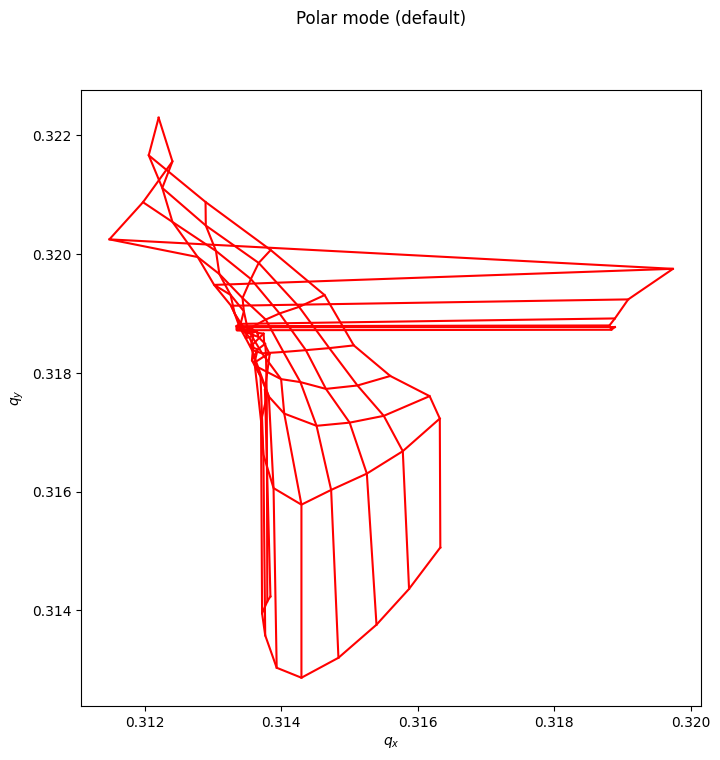

In [21]:
### Same as before without touching coupling knobs
### CHECK
print(tw_pm_1.c_minus)
print(tw_xm_1.c_minus)

# Plot footprint
fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.5e-6,
    nemitt_y=2.5e-6,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1/2)],
)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#fp_polar_xm.plot(ax=ax, label="no rescale bb")
#plt.suptitle("Polar mode (default) - no rescale on beambeam. Xmask.")
#plt.show()


fp_polar = pm_line.get_footprint(
    nemitt_x=2.5e-6,
    nemitt_y=2.5e-6,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="on_bb_charge", v0=0.0, dv=0.1/2)],
)

#fig, ax = plt.subplots(1, 1, figsize=(8, 8))
fp_polar.plot(ax=ax, label="no rescale bb", color = 'red')
plt.suptitle("Polar mode (default)")
plt.show()